## Generating (Bus_stop - Line popularity metric) (Number of bus lines that enter that bus stop) 

Due to the overhaul of the GTSF data base I have to rely on the ticket validation set in order to determie how many buses enter a given bus stop

Given the extensivity of it (10 years, complete data set). I am going to trust is captures most, if not all bus lines visiing each given bus stop

In [10]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
usecols = ["Line_clean", "Stop_ID", "Pre_2019"]

Ticket_validations = pd.read_csv("c:/users/henry chapman/Documents/Coding/Data_science/Project_final/Output/1_Compiling_data/Pipe4/Ticket_validations.csv", usecols = usecols, dtype={"Line_clean": str})
Ticket_validations.head()

,Line_clean,Stop_ID,Pre_2019
0,1,7820277-1,True
1,1,7820088-1,True
2,1,7820165-1,True
3,1,7820155-1,True
4,1,7820014-1,True


In [6]:
Data = Ticket_validations.drop_duplicates()
Data.head()

,Line_clean,Stop_ID,Pre_2019
0,1,7820277-1,True
1,1,7820088-1,True
2,1,7820165-1,True
3,1,7820155-1,True
4,1,7820014-1,True


In [7]:
# Aggregate to one row per Stop_ID + Pre_2019
visiting_scores = (
    Data
    .groupby(["Stop_ID", "Pre_2019"])
    .size()  # counts how many times each stop was visited
    .reset_index(name="Visiting_score")
)

visiting_scores.head()


,Stop_ID,Pre_2019,Visiting_score
0,144360,True,1
1,144382,False,1
2,144384,False,1
3,144466,True,1
4,7800070-1,False,1


In [8]:
# Visiting score relative to the number of buses that are operating pre / post 2019 
# Count the number of unique buses per Pre_2019 group
bus_counts = Data.groupby("Pre_2019")["Line_clean"].nunique()

# Step 3: Assign relative visiting score
visiting_scores["Rel_Visiting_score"] = visiting_scores.apply(
    lambda row: row["Visiting_score"] / bus_counts[row["Pre_2019"]],
    axis=1
)

visiting_scores.head()

,Stop_ID,Pre_2019,Visiting_score,Rel_Visiting_score
0,144360,True,1,0.031250
1,144382,False,1,0.047619
2,144384,False,1,0.047619
3,144466,True,1,0.031250
4,7800070-1,False,1,0.047619


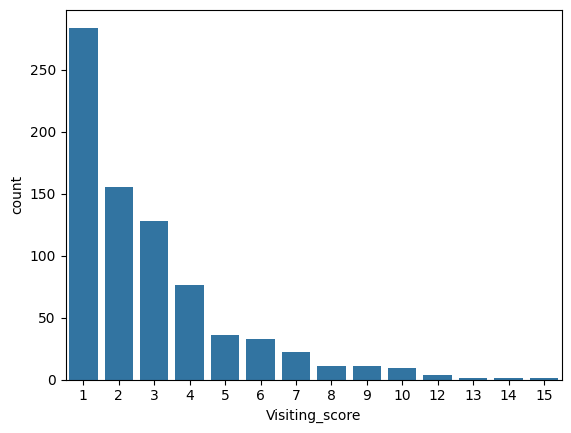

In [13]:
# investigating to ensure its feasible 

sns.countplot(data = visiting_scores, x = "Visiting_score")
plt.show()

## Exporting 

In [12]:
visiting_scores.to_csv("C:/users/henry chapman/Documents/Coding/Data_science/Project_final/Output/1_Compiling_data/Pipe5/Stop_visit_score.csv", index = False)